In [345]:
# -*- coding: utf-8 -*-
%matplotlib inline
import pandas as pd
import numpy as np
from numpy.random import randn
from pandas import Series, DataFrame

In [346]:
import sys  
reload(sys)  
sys.setdefaultencoding('utf8') 

# GroupBy技术

In [6]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : randn(5),
                'data2' : randn(5)})

In [7]:
df

,data1,data2,key1,key2
0,0.626991,1.836799,a,one
1,-0.047956,-0.331723,a,two
2,-0.006963,1.172049,b,one
3,-0.544285,-0.986477,b,two
4,0.979989,-0.886391,a,one


In [8]:
grouped = df['data1'].groupby(df['key1'])

In [9]:
grouped

In [10]:
grouped.mean()

key1
a    0.519675
b   -0.275624
Name: data1, dtype: float64

In [11]:
grouped.max()

key1
a    0.979989
b   -0.006963
Name: data1, dtype: float64

In [12]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()

In [13]:
means

key1  key2
a     one     0.803490
      two    -0.047956
b     one    -0.006963
      two    -0.544285
Name: data1, dtype: float64

In [14]:
means.unstack()

key2,one,two
key1,,
a,0.803490,-0.047956
b,-0.006963,-0.544285


In [15]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
year = np.array([2005, 2005, 2006, 2005, 2006])

In [16]:
df['data1'].groupby([states, year]).mean()

California  2005   -0.047956
            2006   -0.006963
Ohio        2005    0.041353
            2006    0.979989
Name: data1, dtype: float64

In [18]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.519675,0.206228
b,-0.275624,0.092786


In [19]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   0.803490  0.475204
     two  -0.047956 -0.331723
b    one  -0.006963  1.172049
     two  -0.544285 -0.986477

In [21]:
df

,data1,data2,key1,key2
0,0.626991,1.836799,a,one
1,-0.047956,-0.331723,a,two
2,-0.006963,1.172049,b,one
3,-0.544285,-0.986477,b,two
4,0.979989,-0.886391,a,one


In [20]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

## 对分组进行迭代

In [23]:
for name, group in df.groupby('key1'):
    print name
    print group

a
      data1     data2 key1 key2
0  0.626991  1.836799    a  one
1 -0.047956 -0.331723    a  two
4  0.979989 -0.886391    a  one
b
      data1     data2 key1 key2
2 -0.006963  1.172049    b  one
3 -0.544285 -0.986477    b  two


In [25]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print k1, k2
    print group

a one
      data1     data2 key1 key2
0  0.626991  1.836799    a  one
4  0.979989 -0.886391    a  one
a two
      data1     data2 key1 key2
1 -0.047956 -0.331723    a  two
b one
      data1     data2 key1 key2
2 -0.006963  1.172049    b  one
b two
      data1     data2 key1 key2
3 -0.544285 -0.986477    b  two


In [28]:
df

,data1,data2,key1,key2
0,0.626991,1.836799,a,one
1,-0.047956,-0.331723,a,two
2,-0.006963,1.172049,b,one
3,-0.544285,-0.986477,b,two
4,0.979989,-0.886391,a,one


In [26]:
pieces = dict(list(df.groupby('key1')))

In [31]:
pieces.keys()

['a', 'b']

In [34]:
pieces['a']

,data1,data2,key1,key2
0,0.626991,1.836799,a,one
1,-0.047956,-0.331723,a,two
4,0.979989,-0.886391,a,one


In [36]:
# 也可对列进行分组
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [38]:
grouped = df.groupby(df.dtypes, axis=1)

In [39]:
dict(list(grouped))

{dtype('float64'):       data1     data2
 0  0.626991  1.836799
 1 -0.047956 -0.331723
 2 -0.006963  1.172049
 3 -0.544285 -0.986477
 4  0.979989 -0.886391, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

## 选取一个或一组列

In [44]:
df

,data1,data2,key1,key2
0,0.626991,1.836799,a,one
1,-0.047956,-0.331723,a,two
2,-0.006963,1.172049,b,one
3,-0.544285,-0.986477,b,two
4,0.979989,-0.886391,a,one


In [52]:
df.groupby('key1')['data1'] # df['data1'].groupby(df['key1'])

In [53]:
df.groupby('key1')[['data2']] # df[['data2']].groupby(df['key1'])

In [54]:
df.groupby(['key1', 'key2'])[['data2']].mean()  # DataFrame形式的

data2
key1 key2          
a    one   0.475204
     two  -0.331723
b    one   1.172049
     two  -0.986477

In [58]:
s_grouped = df.groupby(['key1', 'key2'])['data2']

In [59]:
s_grouped

In [61]:
s_grouped.mean() # Series形式的

key1  key2
a     one     0.475204
      two    -0.331723
b     one     1.172049
      two    -0.986477
Name: data2, dtype: float64

## 通过字典或Series进行分组

In [62]:
people = DataFrame(np.random.randn(5, 5),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

In [63]:
people

,a,b,c,d,e
Joe,0.035782,0.772549,0.169508,0.258937,0.357756
Steve,-0.752891,0.385569,0.907957,1.034102,-0.165603
Wes,1.533636,0.147992,1.440520,0.029780,0.849172
Jim,-0.640332,0.292013,-0.669294,-0.294438,-0.851956
Travis,1.374616,0.130482,-1.178790,-0.521409,0.452152


In [65]:
people.ix[2:3, ['b', 'c']] = np.nan

In [66]:
people

,a,b,c,d,e
Joe,0.035782,0.772549,0.169508,0.258937,0.357756
Steve,-0.752891,0.385569,0.907957,1.034102,-0.165603
Wes,1.533636,NaN,NaN,0.029780,0.849172
Jim,-0.640332,0.292013,-0.669294,-0.294438,-0.851956
Travis,1.374616,0.130482,-1.178790,-0.521409,0.452152


In [67]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [68]:
by_column = people.groupby(mapping, axis=1)

In [70]:
by_column.sum()

,blue,red
Joe,0.428445,1.166087
Steve,1.942059,-0.532925
Wes,0.029780,2.382808
Jim,-0.963732,-1.200275
Travis,-1.700199,1.957250


In [71]:
map_series = Series(mapping)

In [72]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [74]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


## 通过函数进行分组

In [75]:
people

,a,b,c,d,e
Joe,0.035782,0.772549,0.169508,0.258937,0.357756
Steve,-0.752891,0.385569,0.907957,1.034102,-0.165603
Wes,1.533636,NaN,NaN,0.029780,0.849172
Jim,-0.640332,0.292013,-0.669294,-0.294438,-0.851956
Travis,1.374616,0.130482,-1.178790,-0.521409,0.452152


In [79]:
people.groupby(len).sum() # 默认是按行的

,a,b,c,d,e
3,0.929086,1.064561,-0.499786,-0.005721,0.354973
5,-0.752891,0.385569,0.907957,1.034102,-0.165603
6,1.374616,0.130482,-1.178790,-0.521409,0.452152


In [80]:
people.groupby(len).count()

,a,b,c,d,e
3,3,2,2,3,3
5,1,1,1,1,1
6,1,1,1,1,1


In [81]:
key_list = ['one', 'one', 'one', 'two', 'two']

In [82]:
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one  0.035782  0.772549  0.169508  0.029780  0.357756
  two -0.640332  0.292013 -0.669294 -0.294438 -0.851956
5 one -0.752891  0.385569  0.907957  1.034102 -0.165603
6 two  1.374616  0.130482 -1.178790 -0.521409  0.452152

## 根据索引级别分组

In [91]:
columns= pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names=['city', 'tenor'])

In [92]:
hier_df = DataFrame(randn(4, 5), columns=columns)

In [93]:
hier_df

city         US                            JP          
tenor         1         3         5         1         3
0     -1.094630  0.238109 -0.879757  0.157503 -0.151060
1      0.081956 -1.550644 -0.536295 -2.019551  1.144436
2      0.477730 -0.468529 -1.227455 -0.603309  1.323809
3      0.439873 -0.400301 -0.398201  0.034690  1.911744

In [94]:
hier_df.groupby(level='city', axis=1).count()

city,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


# 数据聚合

In [95]:
df

,data1,data2,key1,key2
0,0.626991,1.836799,a,one
1,-0.047956,-0.331723,a,two
2,-0.006963,1.172049,b,one
3,-0.544285,-0.986477,b,two
4,0.979989,-0.886391,a,one


In [96]:
grouped = df.groupby('key1')

In [102]:
grouped.mean()

,data1,data2
key1,,
a,0.519675,0.206228
b,-0.275624,0.092786


In [103]:
grouped['data1'].min()

key1
a   -0.047956
b   -0.544285
Name: data1, dtype: float64

In [104]:
grouped['data1'].quantile(0.9)

key1
a    0.909389
b   -0.060695
Name: data1, dtype: float64

In [105]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [108]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,1.027945,2.723189
b,0.537322,2.158527


In [109]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.519675  0.522308 -0.047956  0.289517  0.626991  0.803490   
b      2.0 -0.275624  0.379944 -0.544285 -0.409954 -0.275624 -0.141293   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.979989   3.0  0.206228  1.439091 -0.886391 -0.609057 -0.331723   
b    -0.006963   2.0  0.092786  1.526309 -0.986477 -0.446846  0.092786   

                          
           75%       max  
key1                      
a     0.752538  1.836799  
b     0.632418  1.172049

### 通过餐馆小费的例子演示更高级的聚合功能

In [111]:
tips = pd.read_csv('tips.csv')

In [114]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [115]:
# 添加消费占总消费百分比 列
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [116]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


## 面向列的多函数应用

In [117]:
grouped = tips.groupby(['sex', 'smoker'])

In [124]:
grouped_pct = grouped['tip_pct']

In [125]:
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [126]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [127]:
grouped.agg(['mean', 'std', peak_to_peak])

total_bill                              tip            \
                    mean       std peak_to_peak      mean       std   
sex    smoker                                                         
Female No      18.105185  7.286455        28.58  2.773519  1.128425   
       Yes     17.977879  9.189751        41.23  2.931515  1.219916   
Male   No      19.791237  8.726566        40.82  3.113402  1.489559   
       Yes     22.284500  9.911845        43.56  3.051167  1.500120   

                                size                          tip_pct  \
              peak_to_peak      mean       std peak_to_peak      mean   
sex    smoker                                                           
Female No             4.20  2.592593  1.073146            5  0.156921   
       Yes            5.50  2.242424  0.613917            3  0.182150   
Male   No             7.75  2.711340  0.989094            4  0.160669   
       Yes            9.00  2.500000  0.892530            4  0.152771   

                                      
                    std peak_to_peak  
sex    smoker                         
Female No      0.036421     0.195876  
       Yes     0.071595     0.360233  
Male   No      0.041849     0.220186  
       Yes     0.090588     0.674707

In [128]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [148]:
#functions = ['count', 'mean', 'max']
functions = [('计数', 'count'), ('平均值', 'mean'), ('最大值','max')]

result = grouped['tip_pct', 'total_bill'].agg(functions)

In [149]:
result

tip_pct                     total_bill                  
                   璁℃暟       骞冲潎鍊�      鏈�ぇ鍊�        璁℃暟        骞冲潎鍊�   鏈�ぇ鍊�
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [150]:
result['tip_pct']

璁℃暟       骞冲潎鍊�      鏈�ぇ鍊�
sex    smoker                        
Female No      54  0.156921  0.252672
       Yes     33  0.182150  0.416667
Male   No      97  0.160669  0.291990
       Yes     60  0.152771  0.710345

In [151]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]

grouped['tip_pct', 'total_bill'].agg(ftuples)

tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451517
Male   No         0.160669   0.001751    19.791237  76.152961
       Yes        0.152771   0.008206    22.284500  98.244673

In [153]:
# 对不同的列应用不同的函数
grouped.agg({'tip': np.max, 'size': 'sum'})

tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [156]:
grouped.agg({'tip_pct': ['min', 'max', 'mean', 'std'],
             'size': 'sum'})

tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

In [160]:
tips.groupby(['sex', 'smoker'], as_index=False).mean()

,sex,smoker,total_bill,tip,size,tip_pct
0,Female,No,18.105185,2.773519,2.592593,0.156921
1,Female,Yes,17.977879,2.931515,2.242424,0.182150
2,Male,No,19.791237,3.113402,2.711340,0.160669
3,Male,Yes,22.284500,3.051167,2.500000,0.152771


In [161]:
tips.groupby(['sex', 'smoker']).mean()

total_bill       tip      size   tip_pct
sex    smoker                                          
Female No       18.105185  2.773519  2.592593  0.156921
       Yes      17.977879  2.931515  2.242424  0.182150
Male   No       19.791237  3.113402  2.711340  0.160669
       Yes      22.284500  3.051167  2.500000  0.152771

## 分组级运算和转换

In [162]:
df

,data1,data2,key1,key2
0,0.626991,1.836799,a,one
1,-0.047956,-0.331723,a,two
2,-0.006963,1.172049,b,one
3,-0.544285,-0.986477,b,two
4,0.979989,-0.886391,a,one


In [164]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')

In [165]:
k1_means

,mean_data1,mean_data2
key1,,
a,0.519675,0.206228
b,-0.275624,0.092786


In [166]:
pd.merge(df, k1_means, left_on='key1', right_index=True)

,data1,data2,key1,key2,mean_data1,mean_data2
0,0.626991,1.836799,a,one,0.519675,0.206228
1,-0.047956,-0.331723,a,two,0.519675,0.206228
4,0.979989,-0.886391,a,one,0.519675,0.206228
2,-0.006963,1.172049,b,one,-0.275624,0.092786
3,-0.544285,-0.986477,b,two,-0.275624,0.092786


In [168]:
# transform
people

,a,b,c,d,e
Joe,0.035782,0.772549,0.169508,0.258937,0.357756
Steve,-0.752891,0.385569,0.907957,1.034102,-0.165603
Wes,1.533636,NaN,NaN,0.029780,0.849172
Jim,-0.640332,0.292013,-0.669294,-0.294438,-0.851956
Travis,1.374616,0.130482,-1.178790,-0.521409,0.452152


In [169]:
key = ['one', 'two', 'one', 'two', 'one']

people.groupby(key).mean()

,a,b,c,d,e
one,0.981345,0.451515,-0.504641,-0.077564,0.553027
two,-0.696612,0.338791,0.119332,0.369832,-0.508779


In [170]:
people.groupby(key).transform(np.mean)

,a,b,c,d,e
Joe,0.981345,0.451515,-0.504641,-0.077564,0.553027
Steve,-0.696612,0.338791,0.119332,0.369832,-0.508779
Wes,0.981345,0.451515,-0.504641,-0.077564,0.553027
Jim,-0.696612,0.338791,0.119332,0.369832,-0.508779
Travis,0.981345,0.451515,-0.504641,-0.077564,0.553027


In [171]:
def demean(arr):
    return arr - arr.mean()

demeaned = people.groupby(key).transform(demean)

In [172]:
demeaned

,a,b,c,d,e
Joe,-0.945563,0.321033,0.674149,0.336501,-0.195271
Steve,-0.056280,0.046778,0.788625,0.664270,0.343176
Wes,0.552292,NaN,NaN,0.107344,0.296145
Jim,0.056280,-0.046778,-0.788625,-0.664270,-0.343176
Travis,0.393271,-0.321033,-0.674149,-0.443845,-0.100875


In [173]:
demeaned.groupby(key).mean()

,a,b,c,d,e
one,7.401487e-17,0.000000e+00,0.0,0.0,5.551115e-17
two,0.000000e+00,-2.775558e-17,0.0,0.0,-2.775558e-17


## apply：一般性的 "拆分-应用-合并"

In [177]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [188]:
def top(df, n=5, column='tip_pct'):
    return df.sort_index(by=column)[-n:]

In [189]:
top(tips, n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [190]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [193]:
tips.groupby(['smoker', 'day']).apply(top, n=2, column='total_bill')

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  91        22.49   3.50    Male     No   Fri  Dinner     2   
            94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  59        48.27   6.73    Male     No   Sat  Dinner     4   
            212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  112       38.07   4.00    Male     No   Sun  Dinner     3   
            156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 85        34.83   5.17  Female     No  Thur   Lunch     4   
            142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  90        28.97   3.00    Male    Yes   Fri  Dinner     2   
            95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  102       44.30   2.50  Female    Yes   Sat  Dinner     3   
            170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  184       40.55   3.00    Male    Yes   Sun  Dinner     2   
            182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 83        32.68   5.00    Male    Yes  Thur   Lunch     2   
            197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  91   0.155625  
            94   0.142857  
       Sat  59   0.139424  
            212  0.186220  
       Sun  112  0.105070  
            156  0.103799  
       Thur 85   0.148435  
            142  0.121389  
Yes    Fri  90   0.103555  
            95   0.117750  
       Sat  102  0.056433  
            170  0.196812  
       Sun  184  0.073983  
            182  0.077178  
       Thur 83   0.152999  
            197  0.115982

In [194]:
result = tips.groupby('smoker')['tip_pct'].describe()

In [197]:
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [198]:
result.stack()

smoker       
No      count    151.000000
        mean       0.159328
        std        0.039910
        min        0.056797
        25%        0.136906
        50%        0.155625
        75%        0.185014
        max        0.291990
Yes     count     93.000000
        mean       0.163196
        std        0.085119
        min        0.035638
        25%        0.106771
        50%        0.153846
        75%        0.195059
        max        0.710345
dtype: float64

In [199]:
result.stack().unstack()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [200]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


## 分位数和桶分析

In [201]:
frame = DataFrame({'data1': randn(1000),
                   'data2': randn(1000)})

In [204]:
factor = pd.cut(frame.data1, 4)

In [206]:
factor[:10]

0     (0.0637, 1.408]
1     (0.0637, 1.408]
2    (-1.281, 0.0637]
3     (0.0637, 1.408]
4     (0.0637, 1.408]
5    (-1.281, 0.0637]
6    (-1.281, 0.0637]
7     (0.0637, 1.408]
8    (-1.281, 0.0637]
9    (-1.281, 0.0637]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.631, -1.281] < (-1.281, 0.0637] < (0.0637, 1.408] < (1.408, 2.753]]

In [207]:
def get_stats(group):
    return {'min': group.min(),
            'max': group.max(),
            'count': group.count(),
            'mean': group.mean()}

In [208]:
grouped = frame.data2.groupby(factor)

In [210]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-2.631, -1.281]",90.0,2.138409,-0.099839,-2.266408
"(-1.281, 0.0637]",432.0,3.313928,-0.020800,-3.092942
"(0.0637, 1.408]",393.0,2.508707,-0.030748,-3.824122
"(1.408, 2.753]",85.0,2.955245,-0.020856,-1.952854


In [211]:
grouping = pd.qcut(frame.data1, 10, labels=False)

grouped = frame.data2.groupby(grouping)

In [212]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,2.138409,-0.099001,-2.266408
1,100.0,2.505481,-0.052471,-2.457596
2,100.0,2.022128,-0.066609,-3.092942
3,100.0,3.313928,-0.057825,-2.489743
4,100.0,2.435388,-0.004586,-2.123494
5,100.0,2.508707,0.010790,-3.027929
6,100.0,2.161226,0.158921,-1.790247
7,100.0,2.039364,-0.190752,-3.824122
8,100.0,2.086499,-0.009416,-2.292599


### 示例：用特定于分组的值填充缺失值：

In [216]:
s = Series(randn(6))

In [218]:
s[::2] = np.nan

In [219]:
s

0         NaN
1   -0.688043
2         NaN
3    0.492939
4         NaN
5    0.068887
dtype: float64

In [220]:
s.fillna(s.mean())

0   -0.042072
1   -0.688043
2   -0.042072
3    0.492939
4   -0.042072
5    0.068887
dtype: float64

In [221]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']

group_key = ['East'] * 4 + ['West'] * 4

In [222]:
group_key

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [223]:
data = Series(randn(8), index=states)

In [231]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan

In [232]:
data

Ohio          0.543132
New York      0.572148
Vermont            NaN
Florida      -1.133161
Oregon       -1.268572
Nevada             NaN
California    0.958645
Idaho              NaN
dtype: float64

In [233]:
data.groupby(group_key).mean()

East   -0.005960
West   -0.154963
dtype: float64

In [234]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          0.543132
New York      0.572148
Vermont      -0.005960
Florida      -1.133161
Oregon       -1.268572
Nevada       -0.154963
California    0.958645
Idaho        -0.154963
dtype: float64

In [235]:
# 也可以预定义各组的填充值
fill_values = {'East': 0.5, 'West': -1}

fill_func = lambda g: g.fillna(fill_values[g.name])

data.groupby(group_key).apply(fill_func)

Ohio          0.543132
New York      0.572148
Vermont       0.500000
Florida      -1.133161
Oregon       -1.268572
Nevada       -1.000000
California    0.958645
Idaho        -1.000000
dtype: float64

In [236]:
data

Ohio          0.543132
New York      0.572148
Vermont            NaN
Florida      -1.133161
Oregon       -1.268572
Nevada             NaN
California    0.958645
Idaho              NaN
dtype: float64

### 示例：随机采样和排列

In [240]:
suits = ['H', 'S', 'C', 'D']
card_val = (range(1, 11) + [10] * 3) * 4
card_val

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10]

In [249]:
base_names = ['A'] + range(2, 11) + ['J', 'Q', 'K']
base_names

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K']

In [250]:
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)
cards[:10]

['AH', '2H', '3H', '4H', '5H', '6H', '7H', '8H', '9H', '10H']

In [251]:
deck = Series(card_val, index=cards)

In [252]:
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
QH     10
KH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
QS     10
KS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
QC     10
KC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
QD     10
KD     10
dtype: int64

In [254]:
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])

In [259]:
draw(deck)

AH     1
7H     7
KH    10
9H     9
JC    10
dtype: int64

In [258]:
np.random.permutation(len(deck))[:5]

array([33, 29, 16, 49, 31])

In [260]:
deck.take([1, 2, 3])

2H    2
3H    3
4H    4
dtype: int64

In [261]:
# 依据花色抽取各抽取两张
get_suit = lambda card: card[-1] # 只要最后一个字母就可以了

In [265]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

KC    10
5C     5
JD    10
4D     4
8H     8
9H     9
9S     9
QS    10
dtype: int64

In [264]:
deck.groupby(get_suit).apply(draw, n=2)

C  3C     3
   4C     4
D  9D     9
   6D     6
H  5H     5
   3H     3
S  JS    10
   3S     3
dtype: int64

### 示例：分组加权平均数和相关系数

In [275]:
df = DataFrame({'category': ['a', 'a', 'b', 'b', 'b', 'b'],
                'data': np.random.randn(6),
                'weights': np.random.rand(6)})
df

,category,data,weights
0,a,0.525737,0.154340
1,a,-2.089101,0.967457
2,b,1.077043,0.738603
3,b,-1.222120,0.599201
4,b,-0.040745,0.524218
5,b,0.305008,0.655386


In [276]:
grouped = df.groupby('category')

In [277]:
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])

In [278]:
grouped.apply(get_wavg)

category
a   -1.729344
b    0.096032
dtype: float64

In [288]:
close_px = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)

In [294]:
close_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [295]:
rets = close_px.pct_change().dropna()

In [298]:
rets.head()

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386


In [299]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [300]:
by_year = rets.groupby(lambda x: x.year)

In [301]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [302]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### 面向分组的线性回归

In [303]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [304]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


# 透视表与交叉表

In [312]:
tips.pivot_table(index=['sex', 'smoker'])

size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [310]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'], columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   2.500000  2.000000  0.165296  0.209129
       Sat   2.307692  2.200000  0.147993  0.163817
       Sun   3.071429  2.500000  0.165710  0.237075
       Thur  2.480000  2.428571  0.155971  0.163073
Male   Fri   2.000000  2.125000  0.138005  0.144730
       Sat   2.656250  2.629630  0.162132  0.139067
       Sun   2.883721  2.600000  0.158291  0.173964
       Thur  2.500000  2.300000  0.165706  0.164417

In [313]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'], columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   2.500000  2.000000  2.111111  0.165296  0.209129  0.199388
       Sat   2.307692  2.200000  2.250000  0.147993  0.163817  0.156470
       Sun   3.071429  2.500000  2.944444  0.165710  0.237075  0.181569
       Thur  2.480000  2.428571  2.468750  0.155971  0.163073  0.157525
Male   Fri   2.000000  2.125000  2.100000  0.138005  0.144730  0.143385
       Sat   2.656250  2.629630  2.644068  0.162132  0.139067  0.151577
       Sun   2.883721  2.600000  2.810345  0.158291  0.173964  0.162344
       Thur  2.500000  2.300000  2.433333  0.165706  0.164417  0.165276
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [314]:
tips.pivot_table('tip_pct',
                 index=['sex', 'smoker'],
                 columns='day',
                 margins=True, 
                 aggfunc=len)

day             Fri   Sat   Sun  Thur    All
sex    smoker                               
Female No       2.0  13.0  14.0  25.0   54.0
       Yes      7.0  15.0   4.0   7.0   33.0
Male   No       2.0  32.0  43.0  20.0   97.0
       Yes      8.0  27.0  15.0  10.0   60.0
All            19.0  87.0  76.0  62.0  244.0

In [319]:
tips.pivot_table('size',
                 index=['time', 'sex', 'smoker'],
                 columns='day',
                 aggfunc='sum',
                 fill_value=0)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

### 交叉表crosstab

In [320]:
from StringIO import StringIO
data = """\
Sample    Gender    Handedness
1    Female    Right-handed
2    Male    Left-handed
3    Female    Right-handed
4    Male    Right-handed
5    Male    Left-handed
6    Male    Right-handed
7    Female    Right-handed
8    Female    Left-handed
9    Male    Right-handed
10    Female    Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [321]:
data

,Sample,Gender,Handedness
0,1,Female,Right-handed
1,2,Male,Left-handed
2,3,Female,Right-handed
3,4,Male,Right-handed
4,5,Male,Left-handed
5,6,Male,Right-handed
6,7,Female,Right-handed
7,8,Female,Left-handed
8,9,Male,Right-handed
9,10,Female,Right-handed


In [323]:
data.pivot_table(index='Gender', columns='Handedness', aggfunc=len, margins=True)

Sample                   
Handedness Left-handed Right-handed   All
Gender                                   
Female             1.0          4.0   5.0
Male               2.0          3.0   5.0
All                3.0          7.0  10.0

In [327]:
data.groupby(['Gender', 'Handedness']).count().unstack()

Sample             
Handedness Left-handed Right-handed
Gender                             
Female               1            4
Male                 2            3

In [329]:
pd.crosstab(data.Gender, data.Handedness, margins=True)

Handedness,Left-handed,Right-handed,All
Gender,,,
Female,1,4,5
Male,2,3,5
All,3,7,10


In [330]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

### 示例：2012联邦选举委员会数据库

In [347]:
fec = pd.read_csv('P00000001-ALL.csv')

In [365]:
fec.columns

Index([u'cmte_id', u'cand_id', u'cand_nm', u'contbr_nm', u'contbr_city',
       u'contbr_st', u'contbr_zip', u'contbr_employer', u'contbr_occupation',
       u'contb_receipt_amt', u'contb_receipt_dt', u'receipt_desc', u'memo_cd',
       u'memo_text', u'form_tp', u'file_num'],
      dtype='object')

In [370]:
unique_cands = fec.cand_nm.unique()

In [371]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [377]:
unique_cands[2]

'Obama, Barack'

In [378]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [380]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [382]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [384]:
fec['party'] = fec.cand_nm.map(parties)

In [389]:
fec.party.value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [390]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [391]:
fec = fec[fec.contb_receipt_amt > 0]

In [392]:
len(fec)

991475

In [393]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [394]:
len(fec_mrbo)

694282

### 根据职业和雇主统计赞助信息

In [395]:
fec.columns

Index([u'cmte_id', u'cand_id', u'cand_nm', u'contbr_nm', u'contbr_city',
       u'contbr_st', u'contbr_zip', u'contbr_employer', u'contbr_occupation',
       u'contb_receipt_amt', u'contb_receipt_dt', u'receipt_desc', u'memo_cd',
       u'memo_text', u'form_tp', u'file_num', u'party'],
      dtype='object')

In [398]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [399]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [400]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [403]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party',
                                aggfunc='sum')

In [405]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

In [407]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


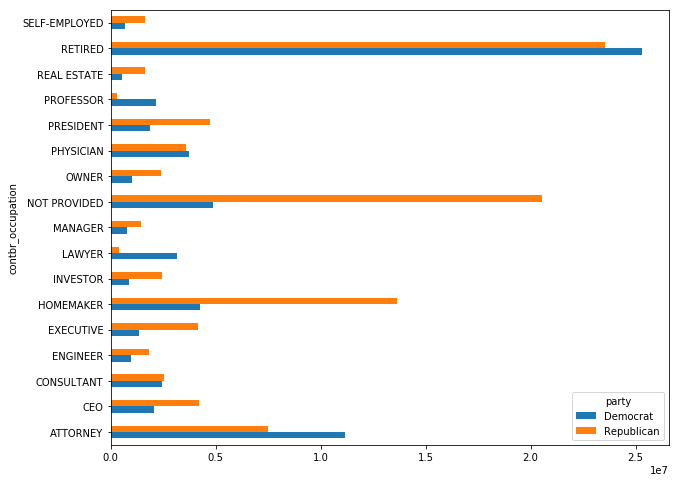

In [410]:
over_2mm.plot(kind='barh', figsize=(10, 8))

In [419]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    # 根据key对totals降序排列
    return totals.sort_values(ascending=False)[:n]

In [420]:
grouped = fec_mrbo.groupby('cand_nm')

grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [421]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

### 对出资额分组

In [422]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])

In [423]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [425]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [431]:
fec_mrbo.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,9.128e+07,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,9.128e+07,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.01201e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican


In [432]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [433]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [434]:
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [447]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)

In [449]:
bucket_sums.sum(axis=1) #对行中元素求和

contb_receipt_amt
(0, 1]                 3.952400e+02
(1, 10]                3.670873e+05
(10, 100]              2.227677e+07
(100, 1000]            7.716191e+07
(1000, 10000]          1.156959e+08
(10000, 100000]        7.180000e+04
(100000, 1000000]      1.490683e+06
(1000000, 10000000]    7.148840e+06
dtype: float64

In [448]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


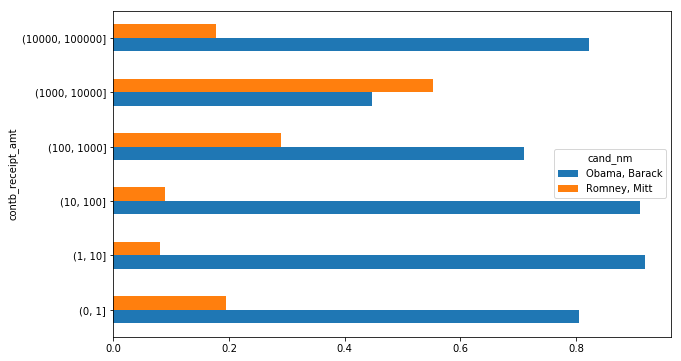

In [441]:
normed_sums[:-2].plot(kind='barh', stacked=False, figsize=(10, 6))

### 根据州统计赞助信息

In [442]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [443]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [444]:
totals = totals[totals.sum(1) > 100000]

In [445]:
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [446]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


# "留下个通过绘制地图来反映竞选赞助情况的小项目没做"